# <b>Twitch Data analysis - Top 3000 most watched twitch channels in 2020</b>

Author: Osman Muglu

Date Created: 18-03-2021

Data source: https://sullygnome.com/channels/2020/watched

## Index


<ol>
    <li>Forming the dataframe</li>
    <li>Exploratory data analysis</li>
    <li>Creating a search function to filter on column values</li>
    <li>Predicting watch time with linear regression</li>
    <li>Conclusion</li>
</ol>

# <b>1. Forming the dataframe</b>

### 1.1 Importing the required packages

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### 1.2 Read the csv files

In [2]:
# 1-10
df1= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 1.csv")
df2= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 2.csv")
df3= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 3.csv")
df4= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 4.csv")
df5= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 5.csv")
df6= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 6.csv")
df7= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 7.csv")
df8= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 8.csv")
df9= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 9.csv")
df10= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 10.csv")
# 11-20
df11= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 11.csv")
df12= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 12.csv")
df13= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 13.csv")
df14= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 14.csv")
df15= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 15.csv")
df16= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 16.csv")
df17= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 17.csv")
df18= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 18.csv")
df19= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 19.csv")
df20= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 20.csv")
# 21-30
df21= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 21.csv")
df22= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 22.csv")
df23= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 23.csv")
df24= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 24.csv")
df25= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 25.csv")
df26= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 26.csv")
df27= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 27.csv")
df28= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 28.csv")
df29= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 29.csv")
df30= pd.read_csv("Most watched Twitch streamers, 2020 - SullyGnome 30.csv")

### 1.3 Concatenate all the retrieved dataframes into one dataframe

In [3]:
Dataframes=[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28,df29,df30]
df=pd.concat(Dataframes)
df.head()


,Unnamed: 0,Unnamed: 1,Channel,Watch time,Stream time,Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language,Unnamed: 13
0,https://static-cdn.jtvnw.net/jtv_user_pictures...,1,xQcOW,8847081540,215010,222720,41146,5522156,5364951,132751155,True,False,English,xQcOW
1,https://static-cdn.jtvnw.net/jtv_user_pictures...,2,Gaules,7720563330,517155,387315,14928,2656501,1416066,136956383,True,True,Portuguese,Gaules
2,https://static-cdn.jtvnw.net/jtv_user_pictures...,3,summit1g,6505033950,221550,310998,29361,5886358,1696810,94561929,True,False,English,summit1g
3,https://static-cdn.jtvnw.net/jtv_user_pictures...,4,ESL_CSGO,4786942590,518580,300575,9230,4645928,892718,128514894,True,False,English,ESL_CSGO
4,https://static-cdn.jtvnw.net/jtv_user_pictures...,5,NICKMERCS,4406970885,127065,163241,34682,5503071,1691981,54622518,True,False,English,NICKMERCS


### 1.4 Adjusting columns and saving the dataframe as a new csv file

In [4]:
df.drop(['Unnamed: 0', 'Unnamed: 1','Unnamed: 13'], axis=1, inplace=True)
df=df.reset_index(drop=True)
df

,Channel,Watch time,Stream time,Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,222720,41146,5522156,5364951,132751155,True,False,English
1,Gaules,7720563330,517155,387315,14928,2656501,1416066,136956383,True,True,Portuguese
2,summit1g,6505033950,221550,310998,29361,5886358,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,300575,9230,4645928,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,163241,34682,5503071,1691981,54622518,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
2995,Rallied,43953420,112515,6246,390,154459,17598,541827,True,False,English
2996,LuckyGhost,43890465,153825,3536,284,34352,14958,895411,True,False,English
2997,Bestmarmotte,43880085,118725,3405,369,90125,13499,1189036,True,False,French
2998,Marco,43875465,123405,3538,355,33556,8715,618823,True,False,French


In [5]:
df['Hours streamed in 2020']=df['Stream time']/60
df['Daily streamtime (hours)']=df['Stream time']/21900 #60*365
df = df[["Channel", "Watch time", "Stream time",  "Hours streamed in 2020", "Daily streamtime (hours)", "Peak viewers", "Average viewers", "Followers", "Followers gained", "Views gained", "Partnered",'Mature', 'Language']]

In [6]:
df.to_csv(r'C:\Users\user\Desktop\Porfolio\Project 3\Most watched Twitch streamers-2020.csv')

In [7]:
df.head()

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,3583.50,9.817808,222720,41146,5522156,5364951,132751155,True,False,English
1,Gaules,7720563330,517155,8619.25,23.614384,387315,14928,2656501,1416066,136956383,True,True,Portuguese
2,summit1g,6505033950,221550,3692.50,10.116438,310998,29361,5886358,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,8643.00,23.679452,300575,9230,4645928,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,2117.75,5.802055,163241,34682,5503071,1691981,54622518,True,False,English


# <b>2. Explotary data analysis</b>

### 2.1 Dataframe description

In [8]:
df.describe()

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03
mean,2.218344e+08,106918.805000,1781.980083,4.882137,2.256100e+04,2958.549000,4.064772e+05,1.622981e+05,6.770083e+06
std,4.444101e+08,79356.330635,1322.605511,3.623577,4.766869e+04,6088.563333,7.671730e+05,3.476940e+05,1.731740e+07
min,4.380940e+07,570.000000,9.500000,0.026027,2.950000e+02,90.000000,6.660000e+02,-3.785400e+04,2.418400e+04
25%,6.111260e+07,59025.000000,983.750000,2.695205,4.713750e+03,691.000000,9.469350e+04,2.408175e+04,1.723077e+06
50%,9.690195e+07,95707.500000,1595.125000,4.370205,9.519500e+03,1287.500000,1.981880e+05,6.219350e+04,3.249484e+06
75%,2.041319e+08,133608.750000,2226.812500,6.100856,2.114800e+04,2738.500000,4.126232e+05,1.606995e+05,6.423163e+06
max,8.847082e+09,524535.000000,8742.250000,23.951370,1.016962e+06,172479.000000,1.667215e+07,5.364951e+06,7.202919e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Channel                   3000 non-null   object 
 1   Watch time                3000 non-null   int64  
 2   Stream time               3000 non-null   int64  
 3   Hours streamed in 2020    3000 non-null   float64
 4   Daily streamtime (hours)  3000 non-null   float64
 5   Peak viewers              3000 non-null   int64  
 6   Average viewers           3000 non-null   int64  
 7   Followers                 3000 non-null   int64  
 8   Followers gained          3000 non-null   int64  
 9   Views gained              3000 non-null   int64  
 10  Partnered                 3000 non-null   bool   
 11  Mature                    3000 non-null   bool   
 12  Language                  3000 non-null   object 
dtypes: bool(2), float64(2), int64(7), object(2)
memory usage: 263.8

### 2.2 Language, Partnership and Maturity analysis

In [10]:
df_language_mean=df.groupby(['Language']).mean()
df_language_mean=df_language_mean.sort_values(by='Watch time', ascending=False)
df_language_mean

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Language,,,,,,,,,,,
English,2.512078e+08,111354.674157,1855.911236,5.084688,27263.233708,3459.127341,501724.826966,172217.508614,7.205096e+06,0.951311,0.286891
Portuguese,2.422367e+08,132880.000000,2214.666667,6.067580,21508.833333,2442.252381,402706.923810,203848.209524,6.366646e+06,0.952381,0.347619
Slovak,2.368400e+08,132922.500000,2215.375000,6.069521,8238.500000,1710.000000,250192.000000,53523.000000,6.516963e+06,1.000000,0.500000
Other,2.344545e+08,90318.750000,1505.312500,4.124144,45286.250000,6110.500000,683065.250000,297729.750000,2.539364e+07,0.500000,0.000000
Spanish,2.205747e+08,79798.782288,1329.979705,3.643780,30265.147601,3561.195572,599600.682657,370701.014760,6.759041e+06,0.966790,0.243542
Korean,2.076696e+08,103282.696335,1721.378272,4.716105,14419.492147,2516.643979,203541.120419,65661.031414,6.410463e+06,0.942408,0.057592
French,2.024374e+08,105929.679144,1765.494652,4.836972,20198.117647,2215.465241,313766.919786,121330.566845,5.561483e+06,0.989305,0.288770
Russian,1.913246e+08,98650.657895,1644.177632,4.504596,18491.100877,2573.307018,224747.728070,97673.385965,9.550617e+06,0.885965,0.140351
Japanese,1.904991e+08,111486.333333,1858.105556,5.090700,15532.400000,3023.755556,100446.488889,39505.444444,4.495866e+06,0.911111,0.000000


In [11]:
df_language_sum=df.groupby(['Language']).sum()
df_language_sum=df_language_sum.sort_values(by='Watch time', ascending=False)
df_language_sum

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Language,,,,,,,,,,,
English,335362417695,148658490,2477641.50,6788.058904,36396417,4617935,669802644,229910374,9618803044,1270,383
Spanish,59775745020,21625470,360424.50,987.464384,8201855,965084,162491785,100459975,1831700176,262,66
Portuguese,50869699335,27904800,465080.00,1274.191781,4516855,512873,84568454,42808124,1336995653,200,73
Russian,43622006115,22492350,374872.50,1027.047945,4215971,586714,51242482,22269532,2177540770,202,32
Korean,39664900785,19726995,328783.25,900.776027,2754123,480679,38876354,12541257,1224398433,180,11
French,37855790565,19808850,330147.50,904.513699,3777048,414292,58674414,22688816,1039997350,185,54
German,32747164170,18330990,305516.50,837.031507,2745582,418142,51190933,16966807,779403016,167,71
Chinese,14989436370,10267755,171129.25,468.847260,789426,174924,10623958,1814051,515051674,87,33
Turkish,11351905335,4509765,75162.75,205.925342,1261866,220010,31143035,12208632,462291519,66,25


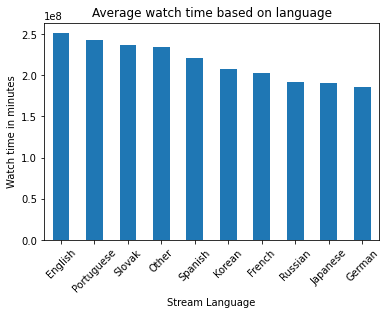

In [12]:
Language_Graph_Data=df_language_mean['Watch time'].head(10)
Language_Graph_Data.plot(kind='bar')
plt.title("Average watch time based on language")
plt.xlabel("Stream Language")
plt.xticks(rotation=45)
plt.ylabel("Watch time in minutes")
plt.show()

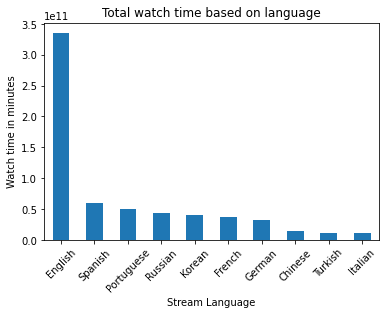

In [13]:
Language_Graph_Data=df_language_sum['Watch time'].head(10)
Language_Graph_Data.plot(kind='bar')
plt.title("Total watch time based on language")
plt.xlabel("Stream Language")
plt.xticks(rotation=45)
plt.ylabel("Watch time in minutes")
plt.show()

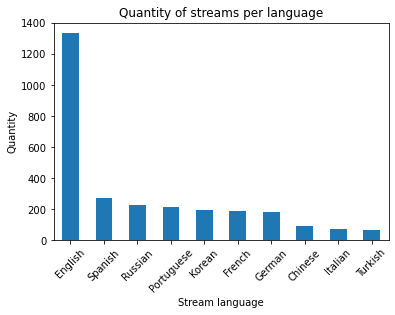

In [14]:
df_lang=df['Language'].value_counts()
df_lang=df_lang.head(10)
df_lang.plot(kind='bar')
plt.title("Quantity of streams per language")
plt.xlabel("Stream language")
plt.xticks(rotation=45)
plt.ylabel("Quantity")
plt.show()

In [15]:
df_partnership_mean=df.groupby(['Partnered']).mean()
df_partnership_mean=df_partnership_mean.sort_values(by='Watch time', ascending=False)
df_partnership_mean.head()

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Mature
Partnered,,,,,,,,,,
True,2.266112e+08,105386.051803,1756.434197,4.812148,22803.787539,2950.736787,416239.240112,164719.101855,6.822579e+06,0.263563
False,1.263984e+08,137541.713287,2292.361888,6.280444,17710.433566,3114.629371,211441.783217,113928.202797,5.721270e+06,0.265734


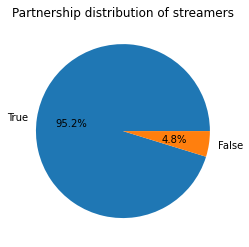

In [16]:
df['Partnered'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Partnership distribution of streamers")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [17]:
df_maturity_mean=df.groupby(['Mature']).mean()
df_maturity_mean=df_maturity_mean.sort_values(by='Watch time', ascending=False)
df_maturity_mean.head()

,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered
Mature,,,,,,,,,,
False,2.336201e+08,106405.416478,1773.423608,4.858695,23784.693526,3235.135808,437013.538253,174271.525577,7.582547e+06,0.952467
True,1.889207e+08,108352.528445,1805.875474,4.947604,19143.647282,2186.134008,321199.466498,128860.185841,4.501141e+06,0.951960


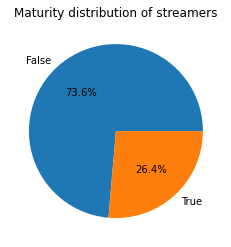

In [18]:
df['Mature'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Maturity distribution of streamers")
plt.xlabel("")
plt.ylabel("")
plt.show()

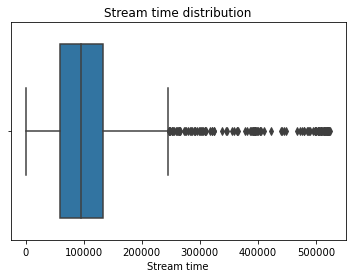

In [19]:
sns.boxplot(x=df['Stream time'])
plt.title("Stream time distribution")
plt.show()

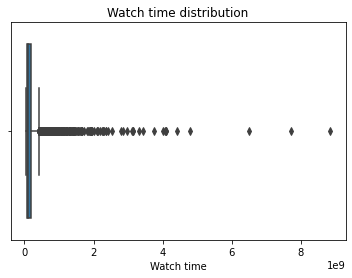

In [20]:
sns.boxplot(x=df['Watch time'])
plt.title("Watch time distribution")
plt.show()

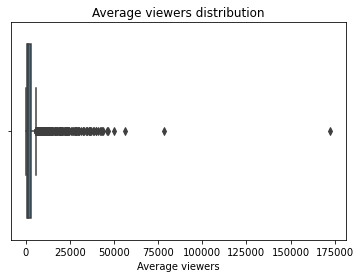

In [21]:
sns.boxplot(x=df['Average viewers'])
plt.title("Average viewers distribution")
plt.show()

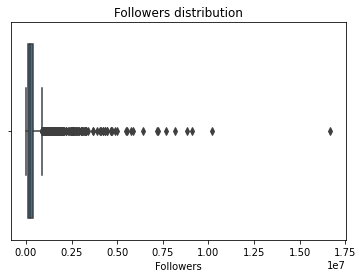

In [22]:
sns.boxplot(x=df['Followers'])
plt.title("Followers distribution")
plt.show()

### 2.4 Analyzing the correlation between columns

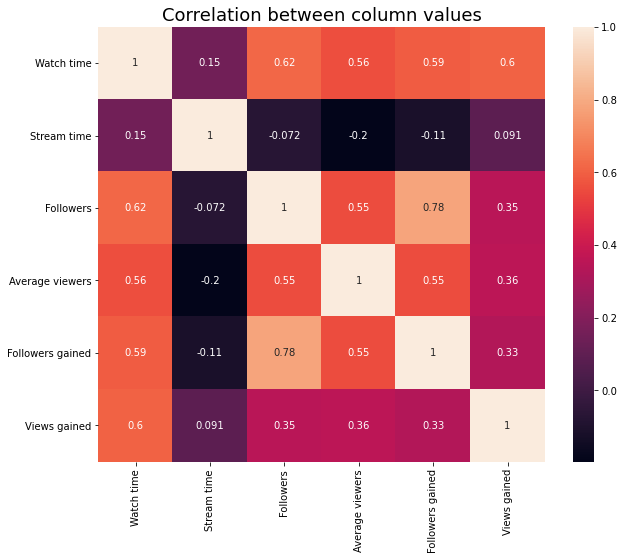

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Watch time', 'Stream time', 'Followers','Average viewers','Followers gained','Views gained']].corr(), annot = True) 
plt.title('Correlation between column values', fontsize = 18)
plt.show()

### 2.5 Creating a histogram to display daily stream time in hours

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


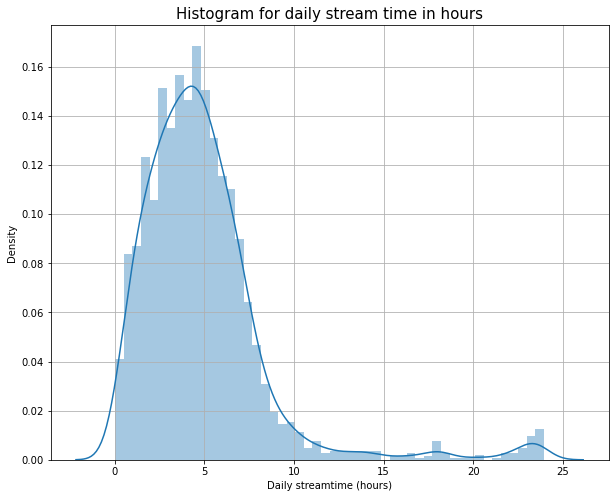

In [24]:
plt.figure(figsize = (10,8))
sns.distplot(df['Daily streamtime (hours)'])
plt.title('Histogram for daily stream time in hours', fontsize=15)
plt.grid()
plt.show()

# <b>3. Creating a search function to filter on column values</b>

In [25]:
def search(x):
    #This function filters the dataframe based on:
    #Index (1-3000), channel name, langauge, maturity and partnership status
    #Input is case sensitive
    if df.loc[df['Channel']==x].shape[0] > 0:
        return df.loc[df['Channel']==x]
    elif df.loc[df['Language']==x].shape[0] > 0:
        return df.loc[df['Language']==x]
    elif df.loc[df['Language']==x].shape[0] > 0:
        return df.loc[df['Language']==x]
    elif x=='Partnered':
        return df[df['Partnered'] == True]
    elif x=='not Partnered':
        return df[df['Partnered'] == False]
    elif x=='Mature':
        return df[df['Mature'] == True]
    elif x=='not Mature':
        return df[df['Mature'] == False]
    elif int(x) in range(3000):
        return df.iloc[[x]]
    else:
        return print('Result not found in dataframe(input is case sensitive, index range is 0-2999)')

In [26]:
search('777')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
777,Patriota,197587035,88110,1468.5,4.023288,29435,2242,859988,465846,6108760,True,False,Portuguese


In [27]:
search('loltyler1')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
5,loltyler1,4096418850,143265,2387.75,6.541781,105499,28593,4246342,1059740,67469321,True,False,English


In [28]:
search('English')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,3583.50,9.817808,222720,41146,5522156,5364951,132751155,True,False,English
2,summit1g,6505033950,221550,3692.50,10.116438,310998,29361,5886358,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,8643.00,23.679452,300575,9230,4645928,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,2117.75,5.802055,163241,34682,5503071,1691981,54622518,True,False,English
5,loltyler1,4096418850,143265,2387.75,6.541781,105499,28593,4246342,1059740,67469321,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,Larxa,44046990,176295,2938.25,8.050000,2355,249,31822,8369,647677,True,True,English
2993,SDShepard,43995000,171045,2850.75,7.810274,1321,256,23093,5481,499705,True,False,English
2995,Rallied,43953420,112515,1875.25,5.137671,6246,390,154459,17598,541827,True,False,English
2996,LuckyGhost,43890465,153825,2563.75,7.023973,3536,284,34352,14958,895411,True,False,English


In [29]:
search('Partnered')

,Channel,Watch time,Stream time,Hours streamed in 2020,Daily streamtime (hours),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,8847081540,215010,3583.50,9.817808,222720,41146,5522156,5364951,132751155,True,False,English
1,Gaules,7720563330,517155,8619.25,23.614384,387315,14928,2656501,1416066,136956383,True,True,Portuguese
2,summit1g,6505033950,221550,3692.50,10.116438,310998,29361,5886358,1696810,94561929,True,False,English
3,ESL_CSGO,4786942590,518580,8643.00,23.679452,300575,9230,4645928,892718,128514894,True,False,English
4,NICKMERCS,4406970885,127065,2117.75,5.802055,163241,34682,5503071,1691981,54622518,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Rallied,43953420,112515,1875.25,5.137671,6246,390,154459,17598,541827,True,False,English
2996,LuckyGhost,43890465,153825,2563.75,7.023973,3536,284,34352,14958,895411,True,False,English
2997,Bestmarmotte,43880085,118725,1978.75,5.421233,3405,369,90125,13499,1189036,True,False,French
2998,Marco,43875465,123405,2056.75,5.634932,3538,355,33556,8715,618823,True,False,French


In [30]:
X = df1[['Stream time','Average viewers','Followers']]
y = df1['Watch time']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 110)

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
linear  = LinearRegression()
linear.fit(X_train,y_train)
pred = linear.predict(X_test)
print('r2 score: '+str(r2_score(y_test, pred)))

r2 score: 0.7771489543464307


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


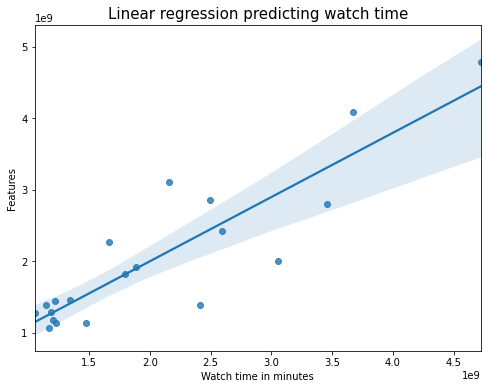

In [33]:
plt.figure(figsize=(8,6))
sns.regplot(pred,y_test)
plt.xlabel('Watch time in minutes')
plt.ylabel('Features')
plt.title("Linear regression predicting watch time", fontsize=15)
plt.show()

# <b>5. Conclusions For The Top 3000 Twitch Channels in 2020 </b>




<ol>
    <li>English twitch channels are by far the most watched streams, followed up by Spanish and Portuguese channels</li>
    <li>95% of the channels are partnered</li>
    <li>26% of the channels contain mature content</li>
<li>There are 95.2% streamers with a partnership and 4.8% without</li>
    <li>On average, streamers have streamed for 1780 hours in 2020. ( 149 hours per month, 34 hours per week, 5 hours per day)</li>
    <li>The daily streamtime is the most around 5 hours</li>
<li>The average streamer has 3000 viewers and 370k followers </li>
<li>When we use 'Stream time', 'Average viewers' and 'Followers' as x, we see that the increase of them will eventually increase the watch time</li>
</ol>